## Car Price Prediction in Python

### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

### Read the file

In [2]:
df = pd.read_csv("car data.csv")

### Data Analysis

In [3]:
# Reading the top 5 rows as default
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df["Owner"].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [5]:
# Reading the bottom 5 rows as default
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [8]:
# Identifying the number of categories in each feature

print(df['Year'].unique())
print(df['Fuel_Type'].unique())
print(df['Selling_type'].unique())
print(df['Transmission'].unique())

[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]
['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [60]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

In [62]:
df['Selling_type'].value_counts()

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64

In [63]:
df['Transmission'].value_counts()

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

In [9]:
# Columns of the dataset
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
# Datatypes of each features
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [11]:
# Number of rows and columns
df.shape

(301, 9)

In [12]:
# Checking for duplicates

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (2, 9)


In [13]:
df.count()

Car_Name         301
Year             301
Selling_Price    301
Present_Price    301
Driven_kms       301
Fuel_Type        301
Selling_type     301
Transmission     301
Owner            301
dtype: int64

In [14]:
# Drop all the duplicates

df = df.drop_duplicates()
df.shape

(299, 9)

In [15]:
# Checking for null values
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [57]:
df['Car_age'] = 2024 - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [39]:
numerical_columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
numerical_df = df[numerical_columns]
corr_matrix = numerical_df.corr()

In [40]:
corr_matrix

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.234369,-0.053167,-0.525714,-0.181639
Selling_Price,0.234369,1.000000,0.876305,0.028566,-0.087880
Present_Price,-0.053167,0.876305,1.000000,0.205224,0.009948
Driven_kms,-0.525714,0.028566,0.205224,1.000000,0.089367
Owner,-0.181639,-0.087880,0.009948,0.089367,1.000000


### Data Visualization

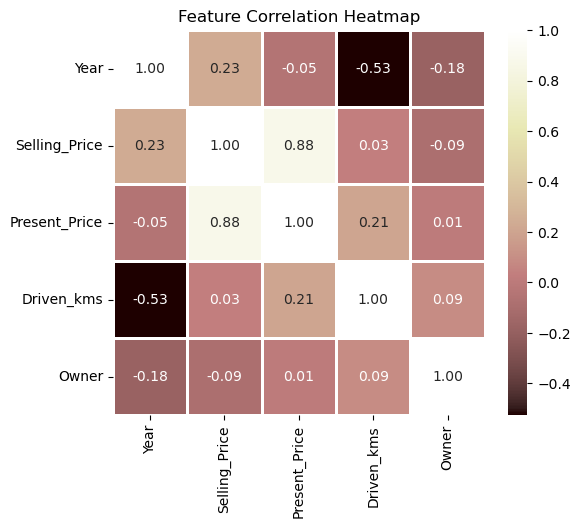

In [43]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='pink',  linewidths=1,fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Driven_kms'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

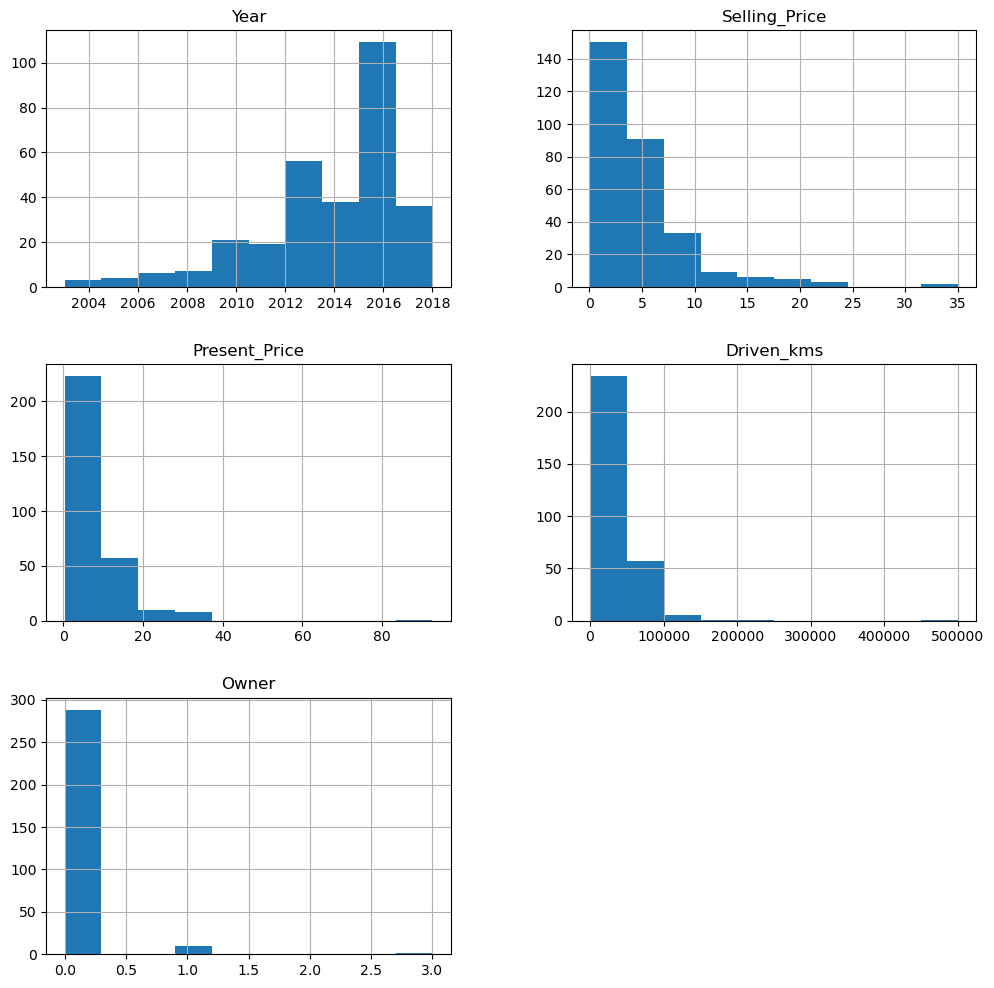

In [38]:
df.hist(figsize  = (12,12))

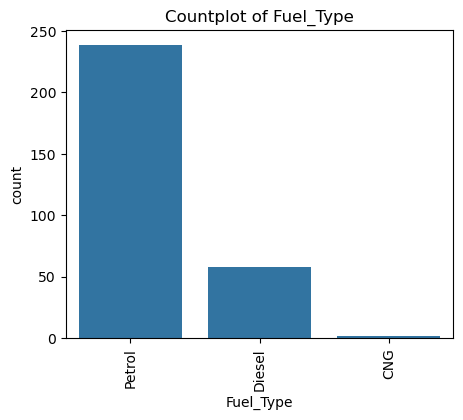

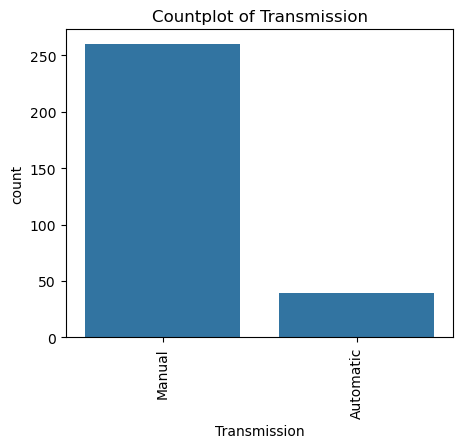

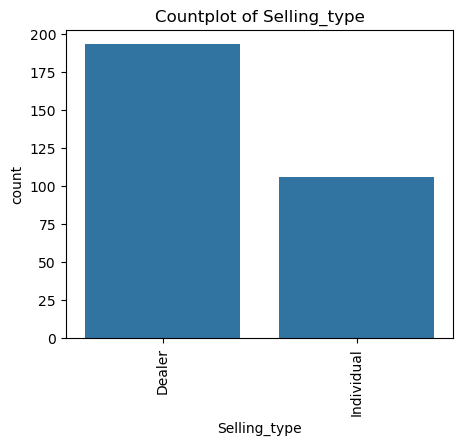

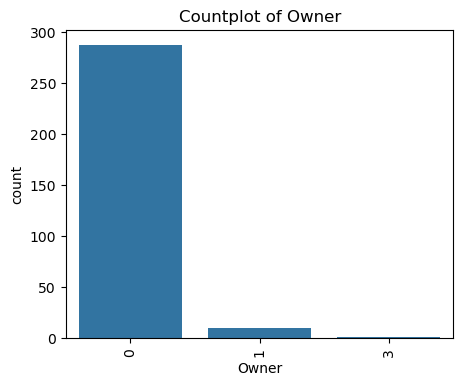

In [55]:
columns = ['Fuel_Type','Transmission','Selling_type','Owner']

for column in columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x=column,data=df)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=90)
    plt.show()

In [44]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


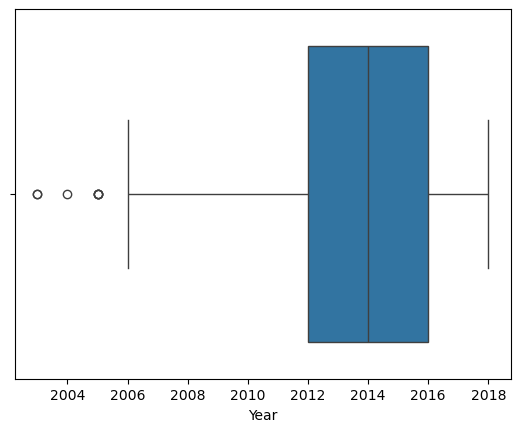

In [17]:
sns.boxplot(x=df['Year'])
plt.show()

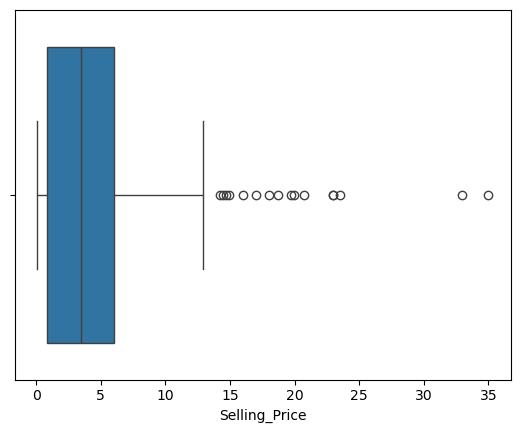

In [18]:
sns.boxplot(x=df['Selling_Price'])
plt.show()

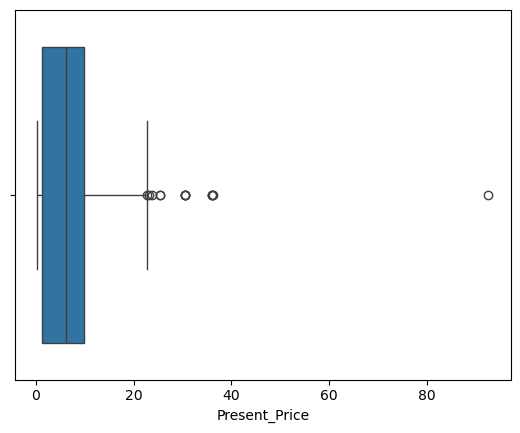

In [19]:
sns.boxplot(x=df['Present_Price'])
plt.show()

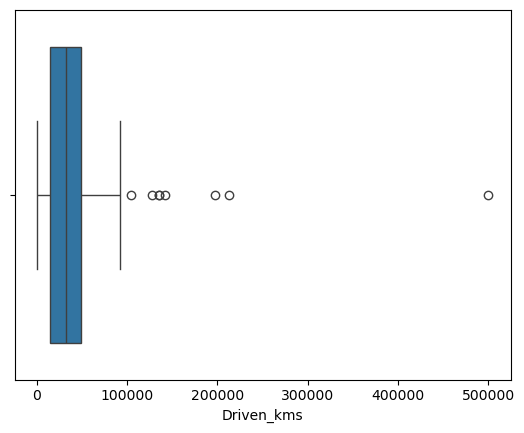

In [21]:
sns.boxplot(x=df['Driven_kms'])
plt.show()

### Model Selection and Deployment

In [22]:
from sklearn.tree import DecisionTreeClassifier

#### Label encoding

In [65]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

df['Year'] = enc.fit_transform(df['Year'])
df['Fuel_Type'] = enc.fit_transform(df['Fuel_Type'])
df['Selling_type'] = enc.fit_transform(df['Selling_type'])
df['Transmission'] = enc.fit_transform(df['Transmission'])
df['Owner'] = enc.fit_transform(df['Owner'])

df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,ritz,11,3.35,5.59,27000,2,0,1,0,10
1,sx4,10,4.75,9.54,43000,1,0,1,0,11
2,ciaz,14,7.25,9.85,6900,2,0,1,0,7
3,wagon r,8,2.85,4.15,5200,2,0,1,0,13
4,swift,11,4.60,6.87,42450,1,0,1,0,10
...,...,...,...,...,...,...,...,...,...,...
296,city,13,9.50,11.60,33988,1,0,1,0,8
297,brio,12,4.00,5.90,60000,2,0,1,0,9
298,city,6,3.35,11.00,87934,2,0,1,0,15
299,city,14,11.50,12.50,9000,1,0,1,0,7


In [68]:
# Identifying X and y for Decision Tree
X = df.drop(columns=['Car_Name','Selling_Price'])
y = df['Selling_Price']

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
def evaluation(y, predictions):
    return {
        'Mean Absolute Error': mean_absolute_error(y, predictions),
        'Mean Square Error': mean_squared_error(y, predictions),
        'Root Mean Square Error': np.sqrt(mean_squared_error(y, predictions)),
        'R-squared': r2_score(y, predictions)
    }

### Linear Regression and Performance Metrics

In [103]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [107]:
print('Evaluation Results for Linear Regression')
print('-'*40)
lr_evaluation = evaluation(y_test,y_pred)
for metric, value in lr_evaluation.items():
    print(f"{metric}: {value}")

Evaluation Results for Linear Regression
----------------------------------------
Mean Absolute Error: 1.5291782906610019
Mean Square Error: 6.497124829172653
Root Mean Square Error: 2.5489458270376506
R-squared: 0.7479122055581034


### Random Forest Regressor and Performance Metrics

In [109]:
rfr = RandomForestRegressor(n_estimators=100,random_state=0)
rfr.fit(X_train,y_train)
y_pred1 = rfr.predict(X_test)

In [110]:
print('Evaluation Results for Random Forest Regressor')
print('-'*45)
rfr_evaluation = evaluation(y_test,y_pred1)
for metric, value in rfr_evaluation.items():
    print(f"{metric}: {value}")

Evaluation Results for Random Forest Regressor
---------------------------------------------
Mean Absolute Error: 1.5537150000000013
Mean Square Error: 13.624746836833344
Root Mean Square Error: 3.6911714721526208
R-squared: 0.47136118356465506


### Gradient Boosting Regressor and Performance Metrics

In [112]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train,y_train)
y_pred2 = gbr.predict(X_test)

In [114]:
print('Evaluation Results for Gradient Boosting Regressor')
print('-'*50)
gbr_evaluation = evaluation(y_test,y_pred2)
for metric, value in gbr_evaluation.items():
    print(f"{metric}: {value}")

Evaluation Results for Gradient Boosting Regressor
--------------------------------------------------
Mean Absolute Error: 1.2427468066436473
Mean Square Error: 8.370940900946259
Root Mean Square Error: 2.893257835200012
R-squared: 0.6752083291292219
